In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("spotify_billboard_merged.csv")
df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,...,chorus_hit,sections,target,track_norm,artist_norm,on_billboard,weeks_on_chart,peak_position,first_charted,last_charted
0,Stupor,Baths,spotify:track:000JBwAOq5d9lNNSnovPYg,0.794,0.669,6,-6.248,1,0.1680,0.258,...,34.82253,6,0,stupor,baths,0,0,0,NaN,NaN
1,I Don't Want A Lover,Texas,spotify:track:000u1dTg7y1XCDXi80hbBX,0.756,0.470,7,-12.615,1,0.0394,0.196,...,31.73840,14,1,i dont want a lover,texas,1,6,77,09/09/1989,14/10/1989
2,Still Got Time,Zayn Featuring PARTYNEXTDOOR,spotify:track:000xQL6tZNLJzIrtIgxqSl,0.748,0.627,7,-6.029,1,0.0644,0.131,...,31.64719,8,1,still got time,zayn partynextdoor,1,3,66,15/04/2017,13/05/2017
3,To the Unknown Man,Vangelis,spotify:track:0024tEymsoc9FyKUauQngQ,0.305,0.234,1,-18.255,1,0.0259,0.752,...,71.29274,22,0,to the unknown man,vangelis,0,0,0,NaN,NaN
4,OMG Rock n Roll,Kevin Morby,spotify:track:002ZKDDKt6oObJzIQq5Mrv,0.427,0.774,9,-4.377,1,0.0502,0.287,...,24.18619,8,0,omg rock n roll,kevin morby,0,0,0,NaN,NaN


In [3]:
#features that we will use for svm model
model_df=df[["danceability","energy","key","mode","speechiness","acousticness",
          "instrumentalness","liveness","valence","duration_ms","time_signature",
          "chorus_hit","on_billboard"]]

In [4]:
model_df.head(3)

,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,duration_ms,time_signature,chorus_hit,on_billboard
0,0.794,0.669,6,1,0.1680,0.258,0.000089,0.3380,0.648,108069,4,34.82253,0
1,0.756,0.470,7,1,0.0394,0.196,0.000487,0.1260,0.430,300600,4,31.73840,1
2,0.748,0.627,7,1,0.0644,0.131,0.000000,0.0852,0.524,188491,4,31.64719,1


In [5]:
model_df.isna().sum()

danceability        0
energy              0
key                 0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
duration_ms         0
time_signature      0
chorus_hit          0
on_billboard        0
dtype: int64

there is no missing values.

In [6]:
for col in model_df.columns:
    print(f"\n--- {col} ---")
    print(f"Min: {df[col].min()}")
    print(f"Max: {df[col].max()}")
    print(f"Unique values: {df[col].nunique()}")
    print(f"Sample values: {df[col].dropna().unique()[:10]}")


--- danceability ---
Min: 0.0
Max: 0.988
Unique values: 1048
Sample values: [0.794 0.756 0.748 0.305 0.427 0.553 0.67  0.353 0.48  0.348]

--- energy ---
Min: 0.000251
Max: 1.0
Unique values: 1787
Sample values: [0.669 0.47  0.627 0.234 0.774 0.717 0.918 0.755 0.435 0.924]

--- key ---
Min: 0
Max: 11
Unique values: 12
Sample values: [ 6  7  1  9 10  5  4  0  2 11]

--- mode ---
Min: 0
Max: 1
Unique values: 2
Sample values: [1 0]

--- speechiness ---
Min: 0.0
Max: 0.96
Unique values: 1346
Sample values: [0.168  0.0394 0.0644 0.0259 0.0502 0.0318 0.37   0.733  0.0305 0.0945]

--- acousticness ---
Min: 0.0
Max: 0.996
Unique values: 4194
Sample values: [2.58e-01 1.96e-01 1.31e-01 7.52e-01 2.87e-01 6.48e-05 1.27e-02 8.22e-02
 2.07e-01 2.36e-01]

--- instrumentalness ---
Min: 0.0
Max: 1.0
Unique values: 5122
Sample values: [8.94e-05 4.87e-04 0.00e+00 9.29e-01 6.78e-01 1.28e-01 5.83e-06 2.29e-03
 3.58e-03 5.64e-04]

--- liveness ---
Min: 0.013
Max: 0.999
Unique values: 1674
Sample values: [0

### INTERVAL
danceability  
energy  
speechiness  
acousticness  
instrumentalness  
liveness  
valence  
duration_ms  
chorus_hit  

### CATEGORICAL
key  
mode  
time_signature  

In [8]:
model_df.dtypes

danceability        float64
energy              float64
key                   int64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
duration_ms           int64
time_signature        int64
chorus_hit          float64
on_billboard          int64
dtype: object

In [9]:
from sklearn.preprocessing import OneHotEncoder

In [10]:
ohe=OneHotEncoder()

In [11]:
xd=ohe.fit_transform(model_df[["key","mode","time_signature"]]).toarray()

In [12]:
ohe.get_feature_names_out()

array(['key_0', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6',
       'key_7', 'key_8', 'key_9', 'key_10', 'key_11', 'mode_0', 'mode_1',
       'time_signature_0', 'time_signature_1', 'time_signature_3',
       'time_signature_4', 'time_signature_5'], dtype=object)

In [13]:
xd=pd.DataFrame(xd)

In [14]:
xd.columns=ohe.get_feature_names_out()

In [15]:
model_df=model_df.drop(columns=["key","mode","time_signature"])

In [16]:
model_df["on_billboard"] = model_df["on_billboard"].astype("category")

In [17]:
model_df[xd.columns]=xd
model_df.head(3)

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,duration_ms,chorus_hit,on_billboard,...,key_9,key_10,key_11,mode_0,mode_1,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,0.794,0.669,0.1680,0.258,0.000089,0.3380,0.648,108069,34.82253,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.756,0.470,0.0394,0.196,0.000487,0.1260,0.430,300600,31.73840,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.748,0.627,0.0644,0.131,0.000000,0.0852,0.524,188491,31.64719,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [18]:
model_df.dtypes

danceability         float64
energy               float64
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
duration_ms            int64
chorus_hit           float64
on_billboard        category
key_0                float64
key_1                float64
key_2                float64
key_3                float64
key_4                float64
key_5                float64
key_6                float64
key_7                float64
key_8                float64
key_9                float64
key_10               float64
key_11               float64
mode_0               float64
mode_1               float64
time_signature_0     float64
time_signature_1     float64
time_signature_3     float64
time_signature_4     float64
time_signature_5     float64
dtype: object

In [19]:
y = model_df["on_billboard"]
X = model_df.drop("on_billboard", axis=1)

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# SPLIT THE DATA

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SCALING

In [22]:
scaler = StandardScaler()  # create scaler object
X_train_scaled = scaler.fit_transform(X_train)  # train
X_test_scaled = scaler.transform(X_test) 

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# FIRST MODEL

In [24]:
param_grid= {"C":[0.01,0.1,10],
             "gamma":[0.01,0.1,1]}

svm_rbf=SVC(kernel="rbf")

In [25]:
grid_search = GridSearchCV(svm_rbf, param_grid, cv=3, scoring="accuracy",n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 10], 'gamma': [0.01, 0.1, 1]},
             scoring='accuracy')

In [26]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 10, 'gamma': 0.01}


In [27]:
best_rbf_model = grid_search.best_estimator_
best_rbf_model


SVC(C=10, gamma=0.01)

In [28]:
y_pred_rbf = best_rbf_model.predict(X_test_scaled)

In [29]:
print(confusion_matrix(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))

[[4128 2041]
 [ 843 5156]]
              precision    recall  f1-score   support

           0       0.83      0.67      0.74      6169
           1       0.72      0.86      0.78      5999

    accuracy                           0.76     12168
   macro avg       0.77      0.76      0.76     12168
weighted avg       0.77      0.76      0.76     12168



In [13]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt

In [33]:
y_scores1=best_rbf_model.decision_function(X_test_scaled)

In [43]:
fpr, tpr,thresholds=roc_curve(y_test.cat.codes, y_scores1)
roc_auc = auc(fpr,tpr)

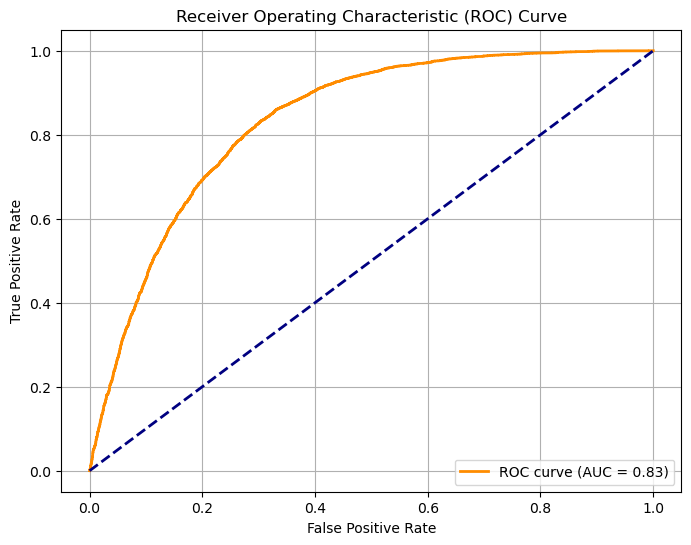

In [44]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# SECOND MODEL

In [24]:
#trying to make it faster
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [50]:
param_grid={"C":[10,50,100],
            "gamma":[0.001,0.05,0.01]}

svm_rbf2=SVC(kernel="rbf")

halving_cv = HalvingGridSearchCV(
                estimator=svm_rbf2,
                param_grid=param_grid,
                scoring="accuracy",
                cv=4,
                factor=2,
                n_jobs=-1)

halving_cv.fit(X_train_scaled, y_train)

HalvingGridSearchCV(cv=4, estimator=SVC(), factor=2, n_jobs=-1,
                    param_grid={'C': [10, 50, 100],
                                'gamma': [0.001, 0.05, 0.01]},
                    scoring='accuracy')

In [51]:
print("Best Params from HalvingGridSearchCV:", halving_cv.best_params_)

Best Params from HalvingGridSearchCV: {'C': 50, 'gamma': 0.01}


In [52]:
print("Best Score:", halving_cv.best_score_)

Best Score: 0.7672936038320654


In [53]:
best_halving_model = halving_cv.best_estimator_
y_pred_halving = best_halving_model.predict(X_test_scaled)

In [54]:
print(confusion_matrix(y_test, y_pred_halving))
print(classification_report(y_test, y_pred_halving))

[[4165 2004]
 [ 848 5151]]
              precision    recall  f1-score   support

           0       0.83      0.68      0.74      6169
           1       0.72      0.86      0.78      5999

    accuracy                           0.77     12168
   macro avg       0.78      0.77      0.76     12168
weighted avg       0.78      0.77      0.76     12168



In [57]:
y_scores_halving = best_halving_model.decision_function(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test.cat.codes, y_scores_halving)
roc_auc = auc(fpr, tpr)

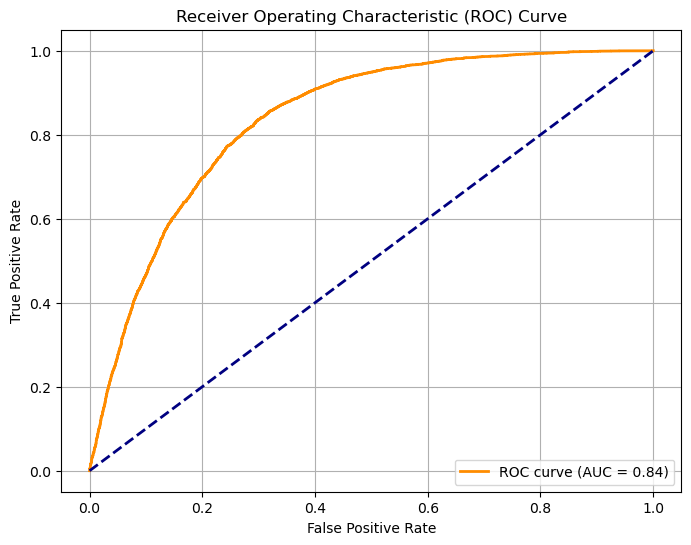

In [56]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### THRESHOLD TRIAL 1 FOR SECOND MODEL

In [62]:
import numpy as np
y_pred_thresh = np.where(y_scores_halving > 0.3, 1, 0)

In [63]:
print(confusion_matrix(y_test, y_pred_thresh))
print(classification_report(y_test, y_pred_thresh))

[[4544 1625]
 [1237 4762]]
              precision    recall  f1-score   support

           0       0.79      0.74      0.76      6169
           1       0.75      0.79      0.77      5999

    accuracy                           0.76     12168
   macro avg       0.77      0.77      0.76     12168
weighted avg       0.77      0.76      0.76     12168



### THRESHOLD TRIAL 2 FOR SECOND MODEL

In [66]:
y_pred_thresh2 = np.where(y_scores_halving > 0.4, 1, 0)
print(confusion_matrix(y_test, y_pred_thresh2))
print(classification_report(y_test, y_pred_thresh2))

[[4680 1489]
 [1398 4601]]
              precision    recall  f1-score   support

           0       0.77      0.76      0.76      6169
           1       0.76      0.77      0.76      5999

    accuracy                           0.76     12168
   macro avg       0.76      0.76      0.76     12168
weighted avg       0.76      0.76      0.76     12168



# THRESHOLD VS PERFORMANCE METRICS

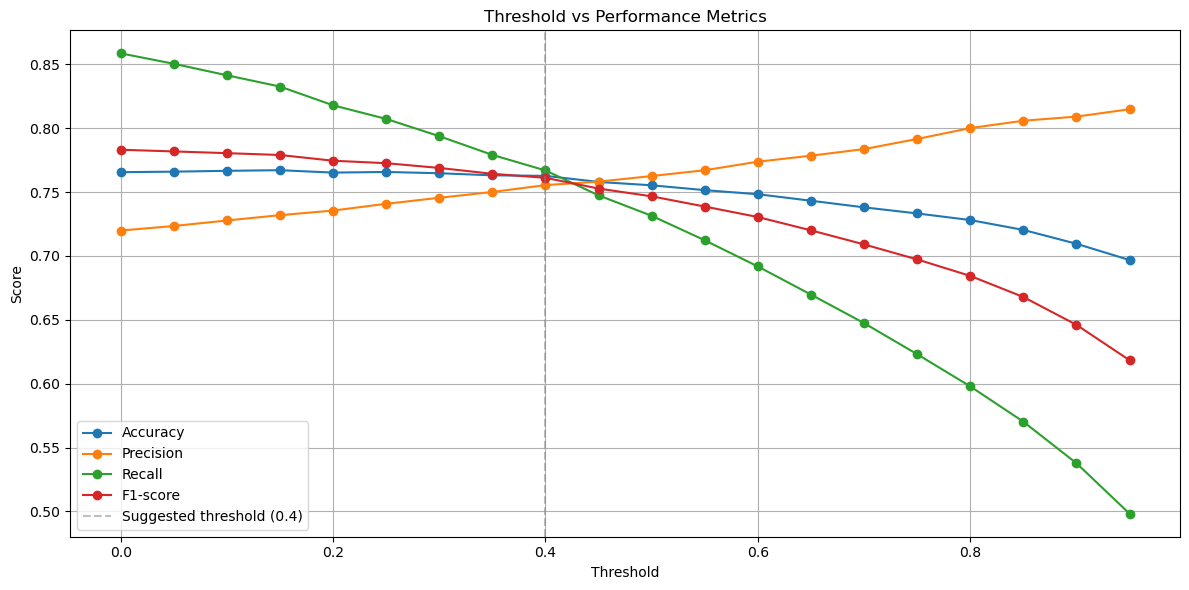

In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

thresholds = np.arange(0.0, 1.0, 0.05)
accuracies, precisions, recalls, f1s = [], [], [], []

for t in thresholds:
    y_pred = np.where(y_scores_halving > t, 1, 0)
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred))

plt.figure(figsize=(12, 6))
plt.plot(thresholds, accuracies, label='Accuracy', marker='o')
plt.plot(thresholds, precisions, label='Precision', marker='o')
plt.plot(thresholds, recalls, label='Recall', marker='o')
plt.plot(thresholds, f1s, label='F1-score', marker='o')
plt.axvline(0.4, color='gray', linestyle='--', alpha=0.5, label='Suggested threshold (0.4)')
plt.title('Threshold vs Performance Metrics')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# THIRD MODEL: 10-FOLD CROSS VALIDATION

In [25]:
param_grid={"C":[10,50,100],
            "gamma":[0.001,0.05,0.01]}

svm_rbf3=SVC(kernel="rbf")

halving_cv = HalvingGridSearchCV(
                estimator=svm_rbf3,
                param_grid=param_grid,
                scoring="accuracy",
                cv=10,
                factor=2,
                n_jobs=-1)

halving_cv.fit(X_train_scaled, y_train)

HalvingGridSearchCV(cv=10, estimator=SVC(), factor=2, n_jobs=-1,
                    param_grid={'C': [10, 50, 100],
                                'gamma': [0.001, 0.05, 0.01]},
                    scoring='accuracy')

In [26]:
print("Best Params from HalvingGridSearchCV:", halving_cv.best_params_)

Best Params from HalvingGridSearchCV: {'C': 50, 'gamma': 0.01}


In [27]:
best_halving_model = halving_cv.best_estimator_
y_pred_halving = best_halving_model.predict(X_test_scaled)

In [28]:
print(confusion_matrix(y_test, y_pred_halving))
print(classification_report(y_test, y_pred_halving))

[[4165 2004]
 [ 848 5151]]
              precision    recall  f1-score   support

           0       0.83      0.68      0.74      6169
           1       0.72      0.86      0.78      5999

    accuracy                           0.77     12168
   macro avg       0.78      0.77      0.76     12168
weighted avg       0.78      0.77      0.76     12168



In [29]:
y_scores_halving = best_halving_model.decision_function(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test.cat.codes, y_scores_halving)
roc_auc = auc(fpr, tpr)

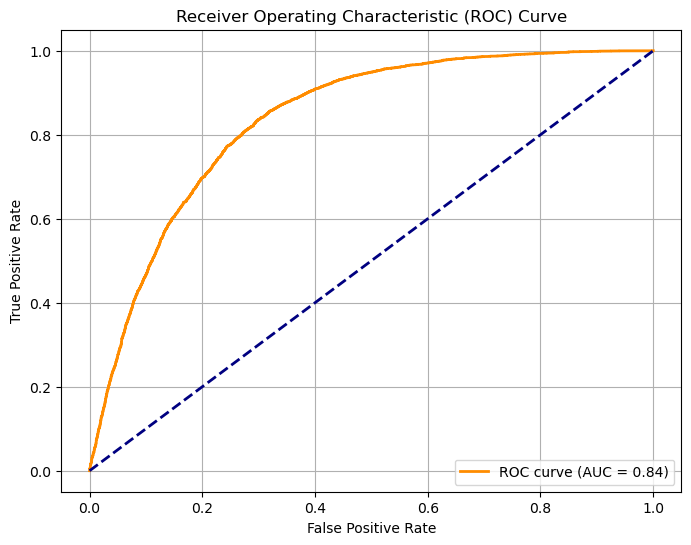

In [30]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [73]:
y_scores_halving = best_halving_model.decision_function(X_test_scaled)
y_pred_thresh3 = np.where(y_scores_halving > 0.4, 1, 0)
print(confusion_matrix(y_test, y_pred_thresh3))
print(classification_report(y_test, y_pred_thresh3))

[[4671 1498]
 [1390 4609]]
              precision    recall  f1-score   support

           0       0.77      0.76      0.76      6169
           1       0.75      0.77      0.76      5999

    accuracy                           0.76     12168
   macro avg       0.76      0.76      0.76     12168
weighted avg       0.76      0.76      0.76     12168



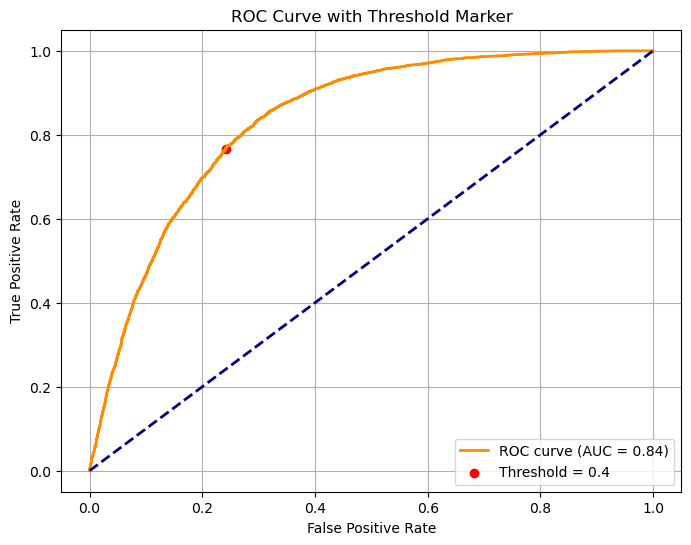

In [31]:
# Calculate FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, y_scores_halving)

# Find the point closest to threshold = 0.4
idx = np.argmin(np.abs(thresholds - 0.4))

# Plot
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Mark threshold = 0.4
plt.scatter(fpr[idx], tpr[idx], color='red', label='Threshold = 0.4')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve with Threshold Marker")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# FORTH MODEL: POLYNOMIAL

In [76]:
from sklearn.experimental import enable_halving_search_cv 

param_grid = {
    'C': [50, 100],
    'degree': [2, 3, 4, 5]
}

poly_model = SVC(kernel='poly')

halving_poly = HalvingGridSearchCV(
    estimator=poly_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    factor=2,     
    n_jobs=-1     
)

halving_poly.fit(X_train_scaled, y_train)

print("Best parameters:", halving_poly.best_params_)
print("Best score:", halving_poly.best_score_)


Best parameters: {'C': 100, 'degree': 2}
Best score: 0.7477810650887574


In [77]:
best_poly = halving_poly.best_estimator_
y_pred_polly = best_poly.predict(X_test_scaled)

In [78]:
print(confusion_matrix(y_test, y_pred_polly))
print(classification_report(y_test, y_pred_polly))

[[3947 2222]
 [ 870 5129]]
              precision    recall  f1-score   support

           0       0.82      0.64      0.72      6169
           1       0.70      0.85      0.77      5999

    accuracy                           0.75     12168
   macro avg       0.76      0.75      0.74     12168
weighted avg       0.76      0.75      0.74     12168



In [79]:
y_scores_polly = halving_cv.decision_function(X_test_scaled)
y_pred_thresh4 = np.where(y_scores_polly > 0.4, 1, 0)
print(confusion_matrix(y_test, y_pred_thresh4))
print(classification_report(y_test, y_pred_thresh4))

[[4671 1498]
 [1390 4609]]
              precision    recall  f1-score   support

           0       0.77      0.76      0.76      6169
           1       0.75      0.77      0.76      5999

    accuracy                           0.76     12168
   macro avg       0.76      0.76      0.76     12168
weighted avg       0.76      0.76      0.76     12168

